In [4]:
import matplotlib.pyplot as plt

def plot_history(history, model_name):
    num_metrics = 3

    plt.figure(figsize=(12, num_metrics * 4))

    plt.subplot(num_metrics, 1, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'Model Accuracy ({model_name})')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.subplot(num_metrics, 1, 2)
    plt.plot(history.history['sparse_top_k_categorical_accuracy'])
    plt.plot(history.history['val_sparse_top_k_categorical_accuracy'])
    plt.title(f'SparseTopKCategoricalAccuracy ({model_name})')
    plt.ylabel('Top-2 genres Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    plt.subplot(num_metrics, 1, 3)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'Model Loss ({model_name})')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

# Example usage:
# plot_history(history, 'model0')

def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    train_loss, train_accuracy, top2 = model.evaluate(X_train, y_train, verbose=0)
    test_loss, test_accuracy, top2 = model.evaluate(X_test, y_test, verbose=0)
    print(f"GTZAN Training Accuracy ({model_name}): {train_accuracy*100:.2f}%")
    print(f"GTZAN Test Accuracy ({model_name}): {test_accuracy*100:.2f}%")
    print(f"GTZAN Test top2 ({model_name}): {top2*100:.2f}%")


In [5]:

!pip install tensorflow==2.11.0
!pip install Pillow==9.5.0
!pip install librosa
!pip install image
!pip install visualkeras
!pip install matplotlib
!pip install pydot
!pip install graphviz
!pip install pysndfx
!pip install sox

ERROR: Could not find a version that satisfies the requirement tensorflow==2.11.0 (from versions: none)
ERROR: No matching distribution found for tensorflow==2.11.0


In [6]:
pip install soundfile


Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install soundfile audioread


Note: you may need to restart the kernel to use updated packages.


In [8]:
import os
import librosa
import soundfile as sf
import audioread  # Add this import to fix the error

def load_audio_data(dataset_path=r"D:\dl_cp\Data\genres_original"):
    genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
    audio_data = {}
    
    for genre in genres:
        genre_path = os.path.join(dataset_path, genre)  # Safer way to join paths
        try:
            audio_files = os.listdir(genre_path)
        except IsADirectoryError:
            continue  # Skip if the expected path is a directory, not a file
        
        audio_data[genre] = {}
        
        for file in audio_files:
            file_path = os.path.join(genre_path, file)  # Safer path joining
            try:
                # Attempt to load the audio file
                audio, _ = librosa.load(file_path, sr=None)
                audio_data[genre][file[:-4]] = audio  # Use file name without extension
            except (OSError, sf.SoundFileError, audioread.NoBackendError) as e:
                # Handle errors related to reading audio files (e.g., format issues)
                print(f"Error loading file {file_path}: {str(e)}")
                continue  # Skip files that can't be loaded
            except IsADirectoryError:
                continue  # Ignore directories within genre folder
    
    return audio_data

# Run the function to load the audio data
dataset_path = r'D:\dl_cp\Data\genres_original'  # Use raw string for the path
audio_data = load_audio_data(dataset_path)

# Optionally, check the structure of the returned data
print(f"Loaded data for {len(audio_data)} genres.")


C:\Users\Admin\AppData\Local\Temp\ipykernel_25868\2195513280.py:23: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, _ = librosa.load(file_path, sr=None)
c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error loading file D:\dl_cp\Data\genres_original\jazz\jazz.00054.wav: 
Loaded data for 10 genres.


In [9]:
!pip install ffmpeg
!pip install soundfile



In [10]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [11]:
!pip install audioread

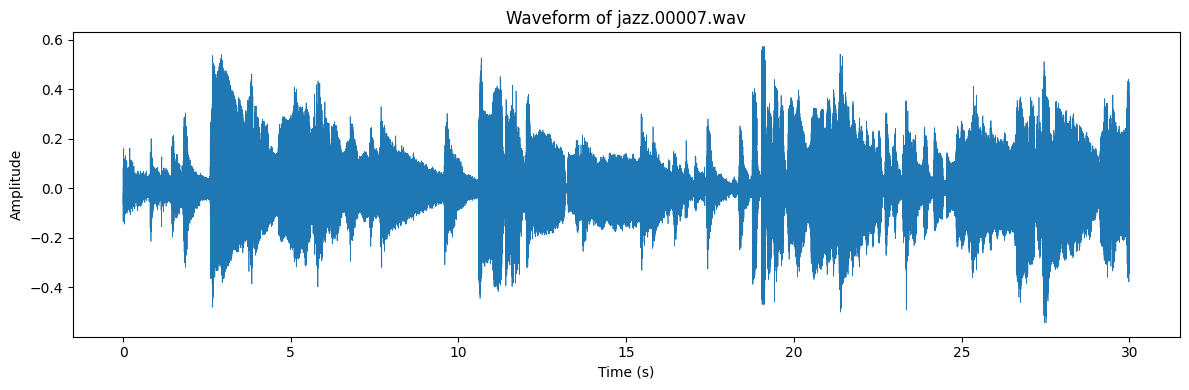

In [12]:
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

AUDIO_FILE = "D:\dl_cp\Data\genres_original\jazz\jazz.00007.wav"
samples, sample_rate = librosa.load(AUDIO_FILE, sr=None)

# Generate time values for each sample
times = np.arange(len(samples)) / sample_rate

plt.figure(figsize=(12, 4))
plt.plot(times, samples, lw=0.5)
plt.title(f'Waveform of jazz.00007.wav')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

In [13]:
pip install ffmpeg


Note: you may need to restart the kernel to use updated packages.


In [14]:
from IPython.display import Audio
Audio(AUDIO_FILE)

In [15]:
print ('Example shape ', samples.shape, 'Sample rate ', sample_rate, 'Data type', type(samples))
print (samples[22400:22420])

Example shape  (661794,) Sample rate  22050 Data type <class 'numpy.ndarray'>
[0.03540039 0.03390503 0.03347778 0.03237915 0.03091431 0.03057861
 0.03079224 0.03170776 0.03271484 0.03341675 0.03521729 0.03720093
 0.03894043 0.04147339 0.04406738 0.04656982 0.04956055 0.05258179
 0.05548096 0.05767822]


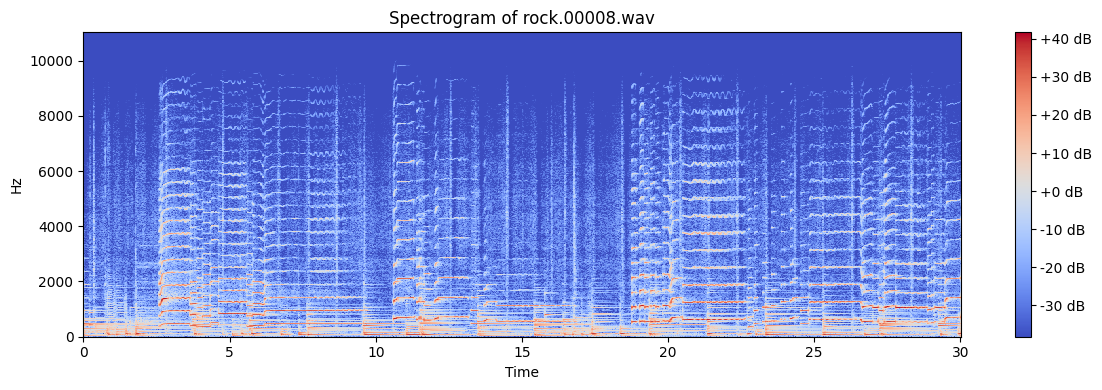

In [16]:
# Compute the Short-Time Fourier Transform (STFT)
stft = librosa.stft(samples)
# Convert the complex-valued STFT to a magnitude spectrum
magnitude = librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(12, 4))
librosa.display.specshow(magnitude, sr=sample_rate, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of rock.00008.wav')
plt.tight_layout()
plt.show()

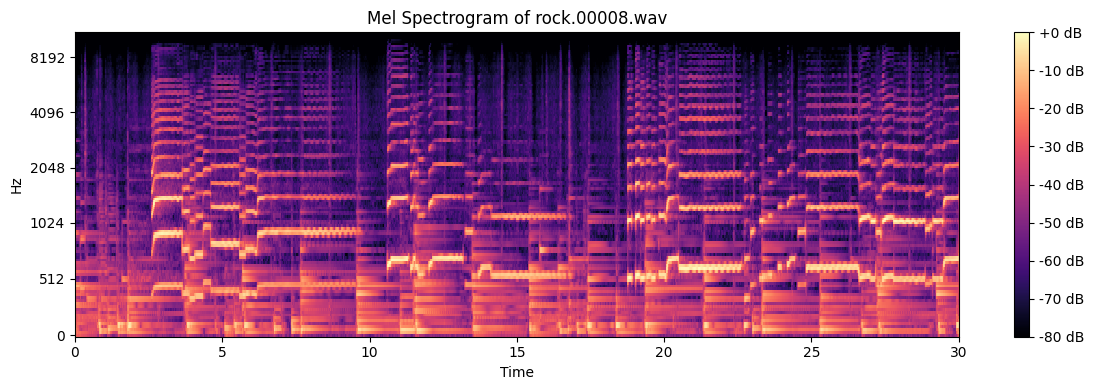

In [17]:
mel_spectrogram = librosa.feature.melspectrogram(y=samples, sr=sample_rate)
mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)
plt.figure(figsize=(12, 4))
librosa.display.specshow(mel_spectrogram_db, sr=sample_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram of rock.00008.wav')
plt.tight_layout()
plt.show()

In [18]:
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

SPECTROGRAM_WIDTH = 5
SPECTROGRAM_HEIGHT = 2

def create_spectrogram(audio, sr, kind='mel', save_path=None):
    """
    Generate and save a spectrogram of the specified kind.

    Parameters:
    audio (ndarray): Audio time series.
    sr (int): Sampling rate of the audio.
    kind (str): Type of spectrogram to generate ('mel' or 'linear').
    save_path (str): Path to save the spectrogram image. If None, the image is not saved.
    """
    plt.figure(figsize=(SPECTROGRAM_WIDTH, SPECTROGRAM_HEIGHT))

    if kind == 'mel':
        # Compute Mel spectrogram
        S = librosa.feature.melspectrogram(y=audio, sr=sr)
        S_DB = librosa.power_to_db(S, ref=np.max)

        librosa.display.specshow(S_DB, sr=sr, x_axis='time', y_axis='mel')
        plt.colorbar(format='%+2.0f dB')
        plt.title('Mel Spectrogram')

    elif kind == 'stft':
        # Compute linear-frequency spectrogram using STFT
        S = np.abs(librosa.stft(audio))
        S_DB = librosa.amplitude_to_db(S, ref=np.max)

        librosa.display.specshow(S_DB, sr=sr, x_axis='time', y_axis='hz')
        plt.colorbar(format='%+2.0f dB')
        plt.title('Linear-frequency Spectrogram')

    else:
        raise ValueError("kind must be 'mel' or 'linear'")

    plt.tight_layout()

    if save_path:
        plt.savefig(save_path)
    else:
        plt.show()

In [19]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

SPECTROGRAM_WIDTH = 5
SPECTROGRAM_HEIGHT = 2

# without labels - image only
def save_spectrogram(audio, sr, save_path, kind='mel', n_fft=2048, hop_length=512, n_mels=128):
    if os.path.exists(save_path):
        print(f'{save_path} already exists')
        return

    fig, ax = plt.subplots(figsize=(SPECTROGRAM_WIDTH, SPECTROGRAM_HEIGHT))
    ax.axis('off')

    if kind == 'mel':
        S = librosa.feature.melspectrogram(y=audio, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
        S_dB = librosa.power_to_db(S, ref=np.max)
        librosa.display.specshow(S_dB, x_axis=None, y_axis=None, sr=sr, fmax=8000, ax=ax)
    elif kind == 'stft':
        S = librosa.stft(audio, n_fft=n_fft, hop_length=hop_length)
        S_dB = librosa.amplitude_to_db(np.abs(S), ref=np.max)
        librosa.display.specshow(S_dB, x_axis=None, y_axis=None, sr=sr, ax=ax)

    fig.tight_layout(pad=0)
    fig.savefig(save_path, bbox_inches='tight', pad_inches=0, transparent=True)
    plt.close(fig)
    print(f'{save_path} - created')

def process_clip(task):
    genre, clip, file_name, save_path = task
    save_spectrogram(clip, DEFAULT_SAMPLE_RATE, save_path, kind='mel', n_fft=4096, hop_length=256, n_mels=256)

In [20]:
import matplotlib.pyplot as plt
from PIL import Image

def preview_spectrogram(image_path, show_label=False, cmap=None):
    """
    Display a spectrogram image from the given path.

    :param image_path: Path to the spectrogram image file.
    :param show_label: If True, display the image with axes and labels; otherwise, display without.
    :param cmap: Colormap for displaying the image. Default is None (matplotlib's default colormap).
    """
    image = Image.open(image_path)
    plt.figure(figsize=(SPECTROGRAM_WIDTH, SPECTROGRAM_HEIGHT))
    plt.imshow(image, cmap=cmap)  # Use the specified colormap

    if not show_label:
        plt.axis('off')

    plt.show()

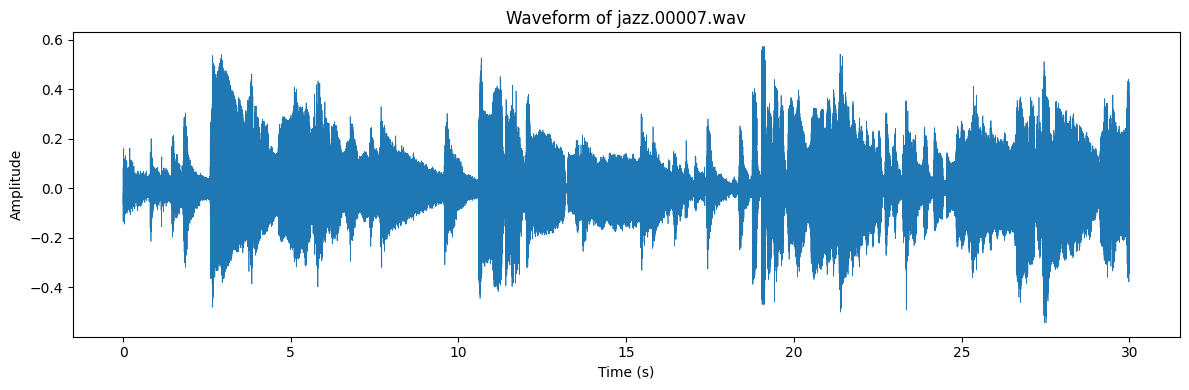

In [21]:
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

AUDIO_FILE = "D:\dl_cp\Data\genres_original\jazz\jazz.00007.wav"
samples, sample_rate = librosa.load(AUDIO_FILE, sr=None)

# Generate time values for each sample
times = np.arange(len(samples)) / sample_rate

plt.figure(figsize=(12, 4))
plt.plot(times, samples, lw=0.5)
plt.title(f'Waveform of jazz.00007.wav')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

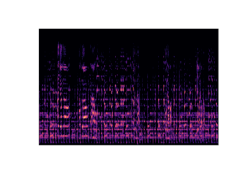

(0, 255, (288, 432, 4))

In [22]:
import numpy as np
from PIL import Image

spectrogram_image = np.array(Image.open(r"D:\dl_cp\Data\images_original\blues\blues00004.png"))


min_value = spectrogram_image.min()
max_value = spectrogram_image.max()
shape = spectrogram_image.shape

preview_spectrogram('D:\\dl_cp\\Data\\images_original\\blues\\blues00004.png', show_label=False)

min_value, max_value, shape 

In [23]:
import os
from PIL import Image

def convert_folder_to_grayscale(source_folder, target_folder):
    """
    Converts all images in source_folder to grayscale and saves them in target_folder.

    :param source_folder: Folder containing the source images.
    :param target_folder: Folder where the grayscale images will be saved.
    """
    os.makedirs(target_folder, exist_ok=True)

    for file_name in os.listdir(source_folder):
        source_path = os.path.join(source_folder, file_name)
        
        if os.path.isfile(source_path) and file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            image = Image.open(source_path)

            # Convert the image to grayscale
            grayscale_image = image.convert("L")

            target_path = os.path.join(target_folder, file_name)

            grayscale_image.save(target_path)
            print(f'Grayscale image saved to {target_path}')

In [24]:
genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

for genre in genres:
    source_folder = f'D:\dl_cp\Data\images_original/{genre}/'
    target_folder = f'dataset/mel_spectrograms_augmentation_grayscale/pitch_shift_n-1/{genre}/'
    convert_folder_to_grayscale(source_folder, target_folder)
    print(f'Converted {genre} spectrograms to grayscale.')

Grayscale image saved to dataset/mel_spectrograms_augmentation_grayscale/pitch_shift_n-1/blues/blues00000.png
Grayscale image saved to dataset/mel_spectrograms_augmentation_grayscale/pitch_shift_n-1/blues/blues00001.png
Grayscale image saved to dataset/mel_spectrograms_augmentation_grayscale/pitch_shift_n-1/blues/blues00002.png
Grayscale image saved to dataset/mel_spectrograms_augmentation_grayscale/pitch_shift_n-1/blues/blues00003.png
Grayscale image saved to dataset/mel_spectrograms_augmentation_grayscale/pitch_shift_n-1/blues/blues00004.png
Grayscale image saved to dataset/mel_spectrograms_augmentation_grayscale/pitch_shift_n-1/blues/blues00005.png
Grayscale image saved to dataset/mel_spectrograms_augmentation_grayscale/pitch_shift_n-1/blues/blues00006.png
Grayscale image saved to dataset/mel_spectrograms_augmentation_grayscale/pitch_shift_n-1/blues/blues00007.png
Grayscale image saved to dataset/mel_spectrograms_augmentation_grayscale/pitch_shift_n-1/blues/blues00008.png
Grayscale 

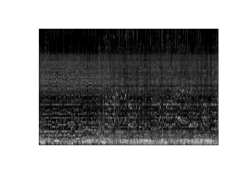

(0, 255, (288, 432))

In [25]:
import numpy as np
from PIL import Image

spectrogram_image =  np.array(Image.open("D:\dl_cp\dataset\mel_spectrograms_augmentation_grayscale\pitch_shift_n-1\metal\metal00000.png"))

min_value = spectrogram_image.min()
max_value = spectrogram_image.max()
shape = spectrogram_image.shape

preview_spectrogram('D:\dl_cp\dataset\mel_spectrograms_augmentation_grayscale\pitch_shift_n-1\metal\metal00000.png', show_label=False, cmap="gray")

min_value, max_value, shape 

In [26]:
import os
import numpy as np
from PIL import Image

def find_duplicate_spectrograms(folder_path):
    file_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.png')]
    spectrogram_arrays = []
    duplicate_files = []

    # Load each spectrogram and convert it to a numerical array
    for file_path in file_paths:
        img = Image.open(file_path)
        img_array = np.array(img)
        spectrogram_arrays.append((file_path, img_array))

    # Check for duplicates
    num_spectrograms = len(spectrogram_arrays)
    for i in range(num_spectrograms):
        for j in range(i + 1, num_spectrograms):
            if np.array_equal(spectrogram_arrays[i][1], spectrogram_arrays[j][1]):
                duplicate_files.append((spectrogram_arrays[i][0], spectrogram_arrays[j][0]))

    return duplicate_files

def find_duplicates_for_genres(genres):
    base_folder_path = 'D:\dl_cp\dataset\mel_spectrograms_augmentation_grayscale\pitch_shift_n-1'
    duplicates_by_genre = {}
    for genre in genres:
        folder_path = os.path.join(base_folder_path, genre)
        duplicates = find_duplicate_spectrograms(folder_path)
        duplicates_by_genre[genre] = duplicates
    return duplicates_by_genre

genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

duplicates_by_genre = find_duplicates_for_genres(genres)

for genre, duplicates in duplicates_by_genre.items():
    if duplicates:
        print(f"\nFound duplicate spectrograms in {genre}:")
        for dup in duplicates:
            print(f"- {dup[0]} and {dup[1]} are duplicates")
    else:
        print(f"No duplicate spectrograms found in {genre}.")

def find_cross_genre_duplicates(base_folder_path):
    genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
    spectrogram_arrays = []
    file_to_genre = {}
    duplicates_across_genres = []

    # Load all spectrograms and convert them to numerical arrays
    for genre in genres:
        folder_path = os.path.join(base_folder_path, genre)
        file_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.png')]
        for file_path in file_paths:
            img = Image.open(file_path)
            img_array = np.array(img)
            spectrogram_arrays.append((file_path, img_array))
            file_to_genre[file_path] = genre


    # Check for duplicates across genres
    num_spectrograms = len(spectrogram_arrays)
    for i in range(num_spectrograms):
        for j in range(i + 1, num_spectrograms):
            if np.array_equal(spectrogram_arrays[i][1], spectrogram_arrays[j][1]):
                if file_to_genre[spectrogram_arrays[i][0]] != file_to_genre[spectrogram_arrays[j][0]]:
                    duplicates_across_genres.append((spectrogram_arrays[i][0], spectrogram_arrays[j][0]))

    return duplicates_across_genres

No duplicate spectrograms found in blues.
No duplicate spectrograms found in classical.
No duplicate spectrograms found in country.

Found duplicate spectrograms in disco:
- D:\dl_cp\dataset\mel_spectrograms_augmentation_grayscale\pitch_shift_n-1\disco\disco00098.png and D:\dl_cp\dataset\mel_spectrograms_augmentation_grayscale\pitch_shift_n-1\disco\disco00099.png are duplicates

Found duplicate spectrograms in hiphop:
- D:\dl_cp\dataset\mel_spectrograms_augmentation_grayscale\pitch_shift_n-1\hiphop\hiphop00039.png and D:\dl_cp\dataset\mel_spectrograms_augmentation_grayscale\pitch_shift_n-1\hiphop\hiphop00045.png are duplicates
- D:\dl_cp\dataset\mel_spectrograms_augmentation_grayscale\pitch_shift_n-1\hiphop\hiphop00076.png and D:\dl_cp\dataset\mel_spectrograms_augmentation_grayscale\pitch_shift_n-1\hiphop\hiphop00078.png are duplicates
No duplicate spectrograms found in jazz.

Found duplicate spectrograms in metal:
- D:\dl_cp\dataset\mel_spectrograms_augmentation_grayscale\pitch_shift_

In [27]:
import os

def remove_duplicate_spectrograms(duplicates_by_genre):
    removed_files = []
    for genre, duplicates in duplicates_by_genre.items():
        for dup in duplicates:
            # Choose the second file in the tuple to remove
            file_to_remove = dup[1]
            try:
                os.remove(file_to_remove)
                print(f"Removing ${file_to_remove}")
                removed_files.append(file_to_remove)
            except OSError as e:
                print(f"Error deleting file {file_to_remove}: {e}")
    return removed_files
remove_duplicate_spectrograms(duplicates_by_genre)

Removing $D:\dl_cp\dataset\mel_spectrograms_augmentation_grayscale\pitch_shift_n-1\disco\disco00099.png
Removing $D:\dl_cp\dataset\mel_spectrograms_augmentation_grayscale\pitch_shift_n-1\hiphop\hiphop00045.png
Removing $D:\dl_cp\dataset\mel_spectrograms_augmentation_grayscale\pitch_shift_n-1\hiphop\hiphop00078.png
Removing $D:\dl_cp\dataset\mel_spectrograms_augmentation_grayscale\pitch_shift_n-1\metal\metal00094.png
Removing $D:\dl_cp\dataset\mel_spectrograms_augmentation_grayscale\pitch_shift_n-1\metal\metal00061.png
Removing $D:\dl_cp\dataset\mel_spectrograms_augmentation_grayscale\pitch_shift_n-1\metal\metal00062.png
Removing $D:\dl_cp\dataset\mel_spectrograms_augmentation_grayscale\pitch_shift_n-1\metal\metal00063.png
Removing $D:\dl_cp\dataset\mel_spectrograms_augmentation_grayscale\pitch_shift_n-1\metal\metal00064.png
Removing $D:\dl_cp\dataset\mel_spectrograms_augmentation_grayscale\pitch_shift_n-1\metal\metal00065.png
Removing $D:\dl_cp\dataset\mel_spectrograms_augmentation_gra

['D:\\dl_cp\\dataset\\mel_spectrograms_augmentation_grayscale\\pitch_shift_n-1\\disco\\disco00099.png',
 'D:\\dl_cp\\dataset\\mel_spectrograms_augmentation_grayscale\\pitch_shift_n-1\\hiphop\\hiphop00045.png',
 'D:\\dl_cp\\dataset\\mel_spectrograms_augmentation_grayscale\\pitch_shift_n-1\\hiphop\\hiphop00078.png',
 'D:\\dl_cp\\dataset\\mel_spectrograms_augmentation_grayscale\\pitch_shift_n-1\\metal\\metal00094.png',
 'D:\\dl_cp\\dataset\\mel_spectrograms_augmentation_grayscale\\pitch_shift_n-1\\metal\\metal00061.png',
 'D:\\dl_cp\\dataset\\mel_spectrograms_augmentation_grayscale\\pitch_shift_n-1\\metal\\metal00062.png',
 'D:\\dl_cp\\dataset\\mel_spectrograms_augmentation_grayscale\\pitch_shift_n-1\\metal\\metal00063.png',
 'D:\\dl_cp\\dataset\\mel_spectrograms_augmentation_grayscale\\pitch_shift_n-1\\metal\\metal00064.png',
 'D:\\dl_cp\\dataset\\mel_spectrograms_augmentation_grayscale\\pitch_shift_n-1\\metal\\metal00065.png',
 'D:\\dl_cp\\dataset\\mel_spectrograms_augmentation_grayscal

In [28]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img

genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

X = []
y = []

GRAYSCALE = True;

for genre in genres:
    if GRAYSCALE:
        genre_folder = f'dataset\mel_spectrograms_augmentation_grayscale\pitch_shift_n-1\{genre}'
    else:
        genre_folder = f'dataset\mel_spectrograms_augmentation_grayscale\pitch_shift_n-1\{genre}'
    for filename in os.listdir(genre_folder):
        image_path = os.path.join(genre_folder, filename)
        if (GRAYSCALE):
            image = load_img(image_path, target_size=(256, 256), color_mode = 'grayscale')
        else:
            image = load_img(image_path, target_size=(256, 256))
        X.append(img_to_array(image))
        y.append(genres.index(genre))

X = np.array(X) / 255.0  # Normalizing data using Min-Max Scaling as our spectrogram
y = np.array(y)


# Splitting data (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 700x 256x256 images and 3 color channels (RGB) 
print("X_train.shape", X_train.shape)
# 300x 256x256 images and 3 color channels (RGB) 
print("X_test.shape", X_test.shape)

# genres integers
print("y_train.shape", y_train.shape)
print("y_test.shape", y_test.shape)



X_train.shape (690, 256, 256, 1)
X_test.shape (296, 256, 256, 1)
y_train.shape (690,)
y_test.shape (296,)


In [29]:
!pip install numpy==1.26.4 tensorflow==2.15.0



In [30]:
import numpy as np
import tensorflow as tf

print("NumPy version:", np.__version__)
print("TensorFlow version:", tf.__version__)


NumPy version: 1.26.4
TensorFlow version: 2.15.0


In [31]:
pip install numpy==1.26.4 tensorflow==2.15.0


Note: you may need to restart the kernel to use updated packages.


In [32]:
from tensorflow.keras.utils import plot_model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.metrics import SparseTopKCategoricalAccuracy
from tensorflow.keras.utils import plot_model


def create_model(input_shape):
    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))

    model.add(Dense(10, activation='softmax'))  # 10 genres

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy', SparseTopKCategoricalAccuracy(k=2)])

    return model

model = create_model(X_train[0].shape)

model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 246016)            0         
                                                                 
 dense (Dense)               (None, 64)              

In [33]:
model = create_model(input_shape=X_train[0].shape)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy', SparseTopKCategoricalAccuracy(k=2)])
# Sanity check
initial_loss, initial_accuracy, initial_top2 = model.evaluate(X_test, y_test, verbose=0)

print(f"Initial loss: {initial_loss:.2f}")
print(f"Initial accuracy: {initial_accuracy:.2f}")
print(f"Initial top2: {initial_top2:.2f}")



Initial loss: 2.30
Initial accuracy: 0.11
Initial top2: 0.21


In [34]:
from tensorflow.keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * 0.9

lr_callback = LearningRateScheduler(scheduler)
model = create_model(X_train[0].shape)

BATCH_SIZE=32
EPOCHS = 10

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)
print('Model input shape:', model.input_shape)


def train_model(model, X_train, y_train, X_test, y_test, epochs=EPOCHS, batch_size=BATCH_SIZE):
    history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE,
                    validation_data=(X_test, y_test))

    return history

history = train_model(model, X_train, y_train, X_test, y_test)
model.save('final_final/model0.h5')

X_train shape: (690, 256, 256, 1)
y_train shape: (690,)
X_test shape: (296, 256, 256, 1)
y_test shape: (296,)
Model input shape: (None, 256, 256, 1)
Epoch 1/10
22/22 [==============================] - 7s 323ms/step - loss: 2.7603 - accuracy: 0.1304 - sparse_top_k_categorical_accuracy: 0.2551 - val_loss: 2.2873 - val_accuracy: 0.1216 - val_sparse_top_k_categorical_accuracy: 0.1622
Epoch 2/10
22/22 [==============================] - 7s 308ms/step - loss: 2.2099 - accuracy: 0.1696 - sparse_top_k_categorical_accuracy: 0.2986 - val_loss: 2.1699 - val_accuracy: 0.1385 - val_sparse_top_k_categorical_accuracy: 0.3784
Epoch 3/10
22/22 [==============================] - 6s 295ms/step - loss: 1.9796 - accuracy: 0.2391 - sparse_top_k_categorical_accuracy: 0.4696 - val_loss: 2.0572 - val_accuracy: 0.2128 - val_sparse_top_k_categorical_accuracy: 0.4088
Epoch 4/10
22/22 [==============================] - 7s 297ms/step - loss: 1.6709 - accuracy: 0.3913 - sparse_top_k_categorical_accuracy: 0.6000 - val

c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [35]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Flatten, Dense, Lambda
from tensorflow.keras.metrics import SparseTopKCategoricalAccuracy
import tensorflow as tf

def create_model(input_shape):
    base_model = VGG16(weights='imagenet', include_top=False,
                       input_shape=(input_shape[0], input_shape[1], 3))

    base_model.trainable = False

    model = Sequential()

    model.add(Lambda(lambda x: tf.tile(x, [1, 1, 1, 3]), input_shape=input_shape))

    model.add(base_model)
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy', SparseTopKCategoricalAccuracy(k=2)])

    return model

model = create_model(input_shape=X_train[0].shape)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 256, 256, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 32768)             0         
                                                                 
 dense_6 (Dense)             (None, 64)                2097216   
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 16812554 (64.13 MB)
Trainable params: 2097866 (8.00 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [36]:
model = create_model(X_train[0].shape)

BATCH_SIZE=32
EPOCHS = 12

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)
print('Model input shape:', model.input_shape)


def train_model(model, X_train, y_train, X_test, y_test, epochs=EPOCHS, batch_size=BATCH_SIZE):
    history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE,
                    validation_data=(X_test, y_test))

    return history

history = train_model(model, X_train, y_train, X_test, y_test)
model.save('final_final/model17.h5')

X_train shape: (690, 256, 256, 1)
y_train shape: (690,)
X_test shape: (296, 256, 256, 1)
y_test shape: (296,)
Model input shape: (None, 256, 256, 1)
Epoch 1/12
22/22 [==============================] - 53s 2s/step - loss: 2.4150 - accuracy: 0.2348 - sparse_top_k_categorical_accuracy: 0.3551 - val_loss: 1.9721 - val_accuracy: 0.3007 - val_sparse_top_k_categorical_accuracy: 0.4223
Epoch 2/12
22/22 [==============================] - 51s 2s/step - loss: 1.6471 - accuracy: 0.4464 - sparse_top_k_categorical_accuracy: 0.6319 - val_loss: 1.6076 - val_accuracy: 0.4865 - val_sparse_top_k_categorical_accuracy: 0.6115
Epoch 3/12
22/22 [==============================] - 51s 2s/step - loss: 1.3639 - accuracy: 0.5696 - sparse_top_k_categorical_accuracy: 0.7420 - val_loss: 1.4544 - val_accuracy: 0.5034 - val_sparse_top_k_categorical_accuracy: 0.6858
Epoch 4/12
22/22 [==============================] - 52s 2s/step - loss: 1.2024 - accuracy: 0.6261 - sparse_top_k_categorical_accuracy: 0.7957 - val_loss: 1

In [37]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Lambda
from tensorflow.keras.metrics import SparseTopKCategoricalAccuracy
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def create_model(input_shape, fine_tune_at=None):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(input_shape[0], input_shape[1], 3))

    if fine_tune_at is not None:
        base_model.trainable = True
        for layer in base_model.layers[:fine_tune_at]:
            layer.trainable = False
    else:
        base_model.trainable = False

    model = Sequential([
        Lambda(lambda x: tf.tile(x, [1, 1, 1, 3]), input_shape=input_shape),  # Adjust the input if necessary
        base_model,
        Flatten(),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])

    return model

model = create_model(input_shape=X_train[0].shape, fine_tune_at=1)

adam_optimizer = Adam(learning_rate=0.0001)

model.compile(optimizer=adam_optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy', SparseTopKCategoricalAccuracy(k=2)])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_2 (Lambda)           (None, 256, 256, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_5 (Flatten)         (None, 32768)             0         
                                                                 
 dense_10 (Dense)            (None, 64)                2097216   
                                                                 
 dense_11 (Dense)            (None, 10)                650       
                                                                 
Total params: 16812554 (64.13 MB)
Trainable params: 16812554 (64.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
BATCH_SIZE=32
EPOCHS = 10

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)
print('Model input shape:', model.input_shape)


def train_model(model, X_train, y_train, X_test, y_test, epochs=EPOCHS, batch_size=BATCH_SIZE):
    history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE,
                    validation_data=(X_test, y_test))

    return history

history = train_model(model, X_train, y_train, X_test, y_test)
model.save('final_final/model18.h5')

X_train shape: (690, 256, 256, 1)
y_train shape: (690,)
X_test shape: (296, 256, 256, 1)
y_test shape: (296,)
Model input shape: (None, 256, 256, 1)
Epoch 1/10
22/22 [==============================] - 154s 7s/step - loss: 2.1704 - accuracy: 0.2101 - sparse_top_k_categorical_accuracy: 0.3406 - val_loss: 1.8020 - val_accuracy: 0.3209 - val_sparse_top_k_categorical_accuracy: 0.5068
Epoch 2/10
22/22 [==============================] - 155s 7s/step - loss: 1.5052 - accuracy: 0.4739 - sparse_top_k_categorical_accuracy: 0.6522 - val_loss: 1.3466 - val_accuracy: 0.5101 - val_sparse_top_k_categorical_accuracy: 0.7399
Epoch 3/10
22/22 [==============================] - 158s 7s/step - loss: 1.2381 - accuracy: 0.5812 - sparse_top_k_categorical_accuracy: 0.7522 - val_loss: 1.5471 - val_accuracy: 0.4426 - val_sparse_top_k_categorical_accuracy: 0.6689
Epoch 4/10
22/22 [==============================] - 159s 7s/step - loss: 1.1136 - accuracy: 0.5841 - sparse_top_k_categorical_accuracy: 0.7899 - val_los

In [39]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Flatten, Dense, Lambda
from tensorflow.keras.metrics import SparseTopKCategoricalAccuracy
import tensorflow as tf

def create_model(input_shape):
    base_model = MobileNet(weights='imagenet', include_top=False,
                           input_shape=(input_shape[0], input_shape[1], 3))

    base_model.trainable = False

    model = Sequential()

    if input_shape[2] == 1:
        model.add(Lambda(lambda x: tf.tile(x, [1, 1, 1, 3]), input_shape=input_shape))

    model.add(base_model)
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy', SparseTopKCategoricalAccuracy(k=2)])

    return model

model = create_model(input_shape=X_train[0].shape)
model.summary()

Exception: URL fetch failure on https://storage.googleapis.com/tensorflow/keras-applications/mobilenet/mobilenet_1_0_224_tf_no_top.h5: None -- [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond

In [40]:
model = create_model(X_train[0].shape)

BATCH_SIZE=32
EPOCHS = 10

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)
print('Model input shape:', model.input_shape)


def train_model(model, X_train, y_train, X_test, y_test, epochs=EPOCHS, batch_size=BATCH_SIZE):
    history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE,
                    validation_data=(X_test, y_test))

    return history

history = train_model(model, X_train, y_train, X_test, y_test)
model.save('final_final/model19.h5')

17225924/17225924 [==============================] - 55s 3us/step
X_train shape: (690, 256, 256, 1)
y_train shape: (690,)
X_test shape: (296, 256, 256, 1)
y_test shape: (296,)
Model input shape: (None, 256, 256, 1)
Epoch 1/10
22/22 [==============================] - 12s 474ms/step - loss: 5.9214 - accuracy: 0.3493 - sparse_top_k_categorical_accuracy: 0.4884 - val_loss: 1.9222 - val_accuracy: 0.4054 - val_sparse_top_k_categorical_accuracy: 0.5338
Epoch 2/10
22/22 [==============================] - 12s 570ms/step - loss: 1.6737 - accuracy: 0.3696 - sparse_top_k_categorical_accuracy: 0.5667 - val_loss: 1.9028 - val_accuracy: 0.3784 - val_sparse_top_k_categorical_accuracy: 0.5473
Epoch 3/10
22/22 [==============================] - 9s 425ms/step - loss: 1.3558 - accuracy: 0.5507 - sparse_top_k_categorical_accuracy: 0.6942 - val_loss: 1.6723 - val_accuracy: 0.5034 - val_sparse_top_k_categorical_accuracy: 0.6351
Epoch 4/10
22/22 [==============================] - 9s 427ms/step - loss: 0.9880 

In [41]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Lambda
from tensorflow.keras.metrics import SparseTopKCategoricalAccuracy
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def create_model(input_shape, fine_tune_at=None):
    base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(input_shape[0], input_shape[1], 3))

    if fine_tune_at is not None:
        base_model.trainable = True
        for layer in base_model.layers[:fine_tune_at]:
            layer.trainable = False
    else:
        base_model.trainable = False

    model = Sequential([
        Lambda(lambda x: tf.tile(x, [1, 1, 1, 3]), input_shape=input_shape),  # Adjust the input if necessary
        base_model,
        Flatten(),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])

    return model

model = create_model(input_shape=X_train[0].shape, fine_tune_at=1)

adam_optimizer = Adam(learning_rate=0.0001)

model.compile(optimizer=adam_optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy', SparseTopKCategoricalAccuracy(k=2)])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_4 (Lambda)           (None, 256, 256, 3)       0         
                                                                 
 mobilenet_1.00_224 (Functi  (None, 8, 8, 1024)        3228864   
 onal)                                                           
                                                                 
 flatten_7 (Flatten)         (None, 65536)             0         
                                                                 
 dense_14 (Dense)            (None, 64)                4194368   
                                                                 
 dense_15 (Dense)            (None, 10)                650       
                                                                 
Total params: 7423882 (28.32 MB)
Trainable params: 7401994 (28.24 MB)
Non-trainable params: 21888 (85.50 KB)
___________

In [42]:
BATCH_SIZE=32
EPOCHS = 10

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)
print('Model input shape:', model.input_shape)


def train_model(model, X_train, y_train, X_test, y_test, epochs=EPOCHS, batch_size=BATCH_SIZE):
    history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE,
                    validation_data=(X_test, y_test))

    return history

history = train_model(model, X_train, y_train, X_test, y_test)
model.save('final_final/model20.h5')

X_train shape: (690, 256, 256, 1)
y_train shape: (690,)
X_test shape: (296, 256, 256, 1)
y_test shape: (296,)
Model input shape: (None, 256, 256, 1)
Epoch 1/10
22/22 [==============================] - 21s 817ms/step - loss: 2.2605 - accuracy: 0.2870 - sparse_top_k_categorical_accuracy: 0.4623 - val_loss: 2.2166 - val_accuracy: 0.1824 - val_sparse_top_k_categorical_accuracy: 0.3345
Epoch 2/10
22/22 [==============================] - 17s 775ms/step - loss: 1.0862 - accuracy: 0.6290 - sparse_top_k_categorical_accuracy: 0.7826 - val_loss: 2.6954 - val_accuracy: 0.2027 - val_sparse_top_k_categorical_accuracy: 0.3514
Epoch 3/10
22/22 [==============================] - 17s 769ms/step - loss: 0.5064 - accuracy: 0.8261 - sparse_top_k_categorical_accuracy: 0.9333 - val_loss: 2.9652 - val_accuracy: 0.1723 - val_sparse_top_k_categorical_accuracy: 0.3615
Epoch 4/10
22/22 [==============================] - 17s 767ms/step - loss: 0.1842 - accuracy: 0.9536 - sparse_top_k_categorical_accuracy: 0.9884 -

In [43]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Flatten, Dense, Lambda, GlobalAveragePooling2D
from tensorflow.keras.metrics import SparseTopKCategoricalAccuracy
import tensorflow as tf

def create_model(input_shape):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(input_shape[0], input_shape[1], 3))

    base_model.trainable = False

    model = Sequential()

    if input_shape[2] == 1:
        model.add(Lambda(lambda x: tf.tile(x, [1, 1, 1, 3]), input_shape=input_shape))

    model.add(base_model)

    model.add(GlobalAveragePooling2D())

    model.add(Dense(256, activation='relu'))
    model.add(Dense(10, activation='softmax'))  # 10 genres

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy', SparseTopKCategoricalAccuracy(k=2)])

    return model

model = create_model(input_shape=X_train[0].shape)

model.summary()

94765736/94765736 [==============================] - 41s 0us/step
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_5 (Lambda)           (None, 256, 256, 3)       0         
                                                                 
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_16 (Dense)            (None, 256)               524544    
                                                                 
 dense_17 (Dense)            (None, 10)                2570      
                                                                 
Total params: 24114826 (91.99 MB)
Trainable params: 52

In [44]:
BATCH_SIZE=32
EPOCHS = 10

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)
print('Model input shape:', model.input_shape)


def train_model(model, X_train, y_train, X_test, y_test, epochs=EPOCHS, batch_size=BATCH_SIZE):
    history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE,
                    validation_data=(X_test, y_test))

    return history

history = train_model(model, X_train, y_train, X_test, y_test)
model.save('final_final/model21.h5')

X_train shape: (690, 256, 256, 1)
y_train shape: (690,)
X_test shape: (296, 256, 256, 1)
y_test shape: (296,)
Model input shape: (None, 256, 256, 1)
Epoch 1/10
22/22 [==============================] - 30s 1s/step - loss: 2.4673 - accuracy: 0.1087 - sparse_top_k_categorical_accuracy: 0.2014 - val_loss: 2.2874 - val_accuracy: 0.1486 - val_sparse_top_k_categorical_accuracy: 0.2804
Epoch 2/10
22/22 [==============================] - 25s 1s/step - loss: 2.3223 - accuracy: 0.0986 - sparse_top_k_categorical_accuracy: 0.2304 - val_loss: 2.2904 - val_accuracy: 0.1858 - val_sparse_top_k_categorical_accuracy: 0.2872
Epoch 3/10
22/22 [==============================] - 26s 1s/step - loss: 2.2894 - accuracy: 0.1348 - sparse_top_k_categorical_accuracy: 0.2348 - val_loss: 2.2779 - val_accuracy: 0.2061 - val_sparse_top_k_categorical_accuracy: 0.3277
Epoch 4/10
22/22 [==============================] - 26s 1s/step - loss: 2.2548 - accuracy: 0.1986 - sparse_top_k_categorical_accuracy: 0.3029 - val_loss: 2

In [45]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.metrics import SparseTopKCategoricalAccuracy
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def create_model(input_shape):
    base_model = MobileNet(weights='imagenet', include_top=False,
                           input_shape=(input_shape[0], input_shape[1], 3))
    base_model.trainable = False

    model = Sequential([
        base_model,
        Flatten(),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])

    def custom_lr_schedule(epoch):
        initial_lr = 0.001
        decay_rate = 0.96
        decay_step = 100000
        min_lr = 1e-5
        lr = initial_lr * (decay_rate ** (epoch / decay_step))
        return max(lr, min_lr)  # Ensure lr does not fall below min_lr

    lr_scheduler = tf.keras.callbacks.LearningRateScheduler(custom_lr_schedule)

    model.compile(optimizer=Adam(),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy', SparseTopKCategoricalAccuracy(k=2)])

    return model, lr_scheduler


model, lr_scheduler = create_model(input_shape=X_train[0].shape)
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functi  (None, 8, 8, 1024)        3228864   
 onal)                                                           
                                                                 
 flatten_8 (Flatten)         (None, 65536)             0         
                                                                 
 dense_18 (Dense)            (None, 64)                4194368   
                                                                 
 dense_19 (Dense)            (None, 10)                650       
                                                                 
Total params: 7423882 (28.32 MB)
Trainable params: 4195018 (16.00 MB)
Non-trainable params: 3228864 (12.32 MB)
_________________________________________________________________


In [46]:
BATCH_SIZE=32
EPOCHS = 10

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)
print('Model input shape:', model.input_shape)


def train_model(model, X_train, y_train, X_test, y_test, epochs=EPOCHS, batch_size=BATCH_SIZE):
    history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE,
                    validation_data=(X_test, y_test),
                    callbacks=[lr_scheduler])

    return history

history = train_model(model, X_train, y_train, X_test, y_test)
model.save('final_final/model22.h5')

X_train shape: (690, 256, 256, 1)
y_train shape: (690,)
X_test shape: (296, 256, 256, 1)
y_test shape: (296,)
Model input shape: (None, 256, 256, 3)
Epoch 1/10


ValueError: in user code:

    File "c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'mobilenet_1.00_224' (type Functional).
    
    Input 0 of layer "conv1" is incompatible with the layer: expected axis -1 of input shape to have value 3, but received input with shape (None, 256, 256, 1)
    
    Call arguments received by layer 'mobilenet_1.00_224' (type Functional):
      • inputs=tf.Tensor(shape=(None, 256, 256, 1), dtype=float32)
      • training=True
      • mask=None


In [ ]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.metrics import SparseTopKCategoricalAccuracy
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def create_model(input_shape, fine_tune_at=None):
    base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(input_shape[0], input_shape[1], 3))

    if fine_tune_at is not None:
        base_model.trainable = True
        for layer in base_model.layers[:fine_tune_at]:
            layer.trainable = False
    else:
        base_model.trainable = False

    model = Sequential([
        base_model, 
        Flatten(),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])

    return model

initial_learning_rate = 0.0001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=initial_learning_rate,
    decay_steps=100000,  
    decay_rate=0.96,
    staircase=True)

adam_optimizer = Adam(learning_rate=lr_schedule)

model = create_model(input_shape=X_train[0].shape, fine_tune_at=1)
model.compile(optimizer=adam_optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy', SparseTopKCategoricalAccuracy(k=2)])
model.summary()

In [ ]:
BATCH_SIZE=32
EPOCHS = 10

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)
print('Model input shape:', model.input_shape)


def train_model(model, X_train, y_train, X_test, y_test, epochs, batch_size):
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                        validation_data=(X_test, y_test),
                        callbacks=[tf.keras.callbacks.LearningRateScheduler(lr_schedule)])
    return history

history = train_model(model, X_train, y_train, X_test, y_test, epochs=EPOCHS, batch_size=BATCH_SIZE)
model.save('final_final/model23.h5')

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Flatten, Dense, Lambda, GlobalAveragePooling2D
from tensorflow.keras.metrics import SparseTopKCategoricalAccuracy
import tensorflow as tf

def create_model(input_shape):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(input_shape[0], input_shape[1], 3))

    base_model.trainable = False

    model = Sequential()

    if input_shape[2] == 1:
        model.add(Lambda(lambda x: tf.tile(x, [1, 1, 1, 3]), input_shape=input_shape))

    model.add(base_model)

    model.add(GlobalAveragePooling2D())

    model.add(Dense(256, activation='relu'))
    model.add(Dense(10, activation='softmax'))  # 10 genres

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy', SparseTopKCategoricalAccuracy(k=2)])

    return model

model = create_model(input_shape=X_train[0].shape)

model.summary()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

BATCH_SIZE=32
EPOCHS = 20

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)
print('Model input shape:', model.input_shape)

def train_model(model, X_train, y_train, X_test, y_test, epochs=EPOCHS, batch_size=BATCH_SIZE):
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )

    reduce_lr = ReduceLROnPlateau(
        monitor='val_accuracy',  
        factor=0.5,              
        patience=5,              
        min_lr=0.0001,           
        verbose=1              
    )

    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(X_test, y_test),
        callbacks=[early_stopping, reduce_lr]
    )

    return history
history = train_model(model, X_train, y_train, X_test, y_test)
model.save('final_final/model24.h5')

In [ ]:
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Lambda, GlobalAveragePooling2D, Dense
from tensorflow.keras.metrics import SparseTopKCategoricalAccuracy
import tensorflow as tf

# --- EfficientNetB0 ---
from tensorflow.keras.applications import EfficientNetB0

def create_efficientnet_model(input_shape, n_classes=10, backbone_trainable=False):
    base_model = EfficientNetB0(
        weights='imagenet',
        include_top=False,
        input_shape=(input_shape[0], input_shape[1], 3)
    )
    base_model.trainable = backbone_trainable

    model = Sequential()
    if input_shape[2] == 1:
        # replicate grayscale -> 3‐channel
        model.add(Lambda(lambda x: tf.tile(x, [1,1,1,3]), input_shape=input_shape))

    model.add(base_model)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(n_classes, activation='softmax'))

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy', SparseTopKCategoricalAccuracy(k=2)]
    )
    return model


# --- DenseNet121 ---
from tensorflow.keras.applications import DenseNet121

def create_densenet_model(input_shape, n_classes=10, backbone_trainable=False):
    base_model = DenseNet121(
        weights='imagenet',
        include_top=False,
        input_shape=(input_shape[0], input_shape[1], 3)
    )
    base_model.trainable = backbone_trainable

    model = Sequential()
    if input_shape[2] == 1:
        model.add(Lambda(lambda x: tf.tile(x, [1,1,1,3]), input_shape=input_shape))

    model.add(base_model)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(n_classes, activation='softmax'))

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy', SparseTopKCategoricalAccuracy(k=2)]
    )
    return model


# --- InceptionV3 ---
from tensorflow.keras.applications import InceptionV3

def create_inception_model(input_shape, n_classes=10, backbone_trainable=False):
    base_model = InceptionV3(
        weights='imagenet',
        include_top=False,
        input_shape=(input_shape[0], input_shape[1], 3)
    )
    base_model.trainable = backbone_trainable

    model = Sequential()
    if input_shape[2] == 1:
        model.add(Lambda(lambda x: tf.tile(x, [1,1,1,3]), input_shape=input_shape))

    model.add(base_model)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(n_classes, activation='softmax'))

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy', SparseTopKCategoricalAccuracy(k=2)]
    )
    return model


In [ ]:
# Example usage
input_shape = X_train.shape[1:]  # e.g. (224,224,3) or (224,224,1)
model_eff = create_efficientnet_model(input_shape)
model_den = create_densenet_model(input_shape)
model_inc = create_inception_model(input_shape)

for m in (model_eff, model_den, model_inc):
    print(m.summary())
    history = train_model(m, X_train, y_train, X_test, y_test)
    m.save(f'final_models/{m.name}.h5')


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model, Sequential
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

def cbam_block(feature_map, ratio=8):
    channel = feature_map.shape[-1]
    shared_mlp = Sequential([
        layers.Dense(channel//ratio, activation='relu'),
        layers.Dense(channel)
    ])
    # channel attention
    avg_pool = layers.GlobalAveragePooling2D()(feature_map)
    max_pool = layers.GlobalMaxPooling2D()(feature_map)
    mlp_avg = shared_mlp(avg_pool)
    mlp_max = shared_mlp(max_pool)
    ch_attn = layers.Activation('sigmoid')(mlp_avg + mlp_max)
    ch_attn = layers.Reshape((1,1,channel))(ch_attn)
    x = layers.Multiply()([feature_map, ch_attn])
    # spatial attention
    avg_sp = layers.Lambda(lambda x: tf.reduce_mean(x, axis=3, keepdims=True))(x)
    max_sp = layers.Lambda(lambda x: tf.reduce_max(x, axis=3, keepdims=True))(x)
    sp = layers.Concatenate(axis=3)([avg_sp, max_sp])
    sp_attn = layers.Conv2D(1, 7, padding='same', activation='sigmoid')(sp)
    return layers.Multiply()([x, sp_attn])

def create_cbam_model(input_shape, n_classes=10):
    inp = layers.Input(shape=input_shape)
    x = inp
    if input_shape[2] == 1:
        x = layers.Lambda(lambda x: tf.tile(x, [1,1,1,3]))(x)
    base = EfficientNetB0(weights='imagenet', include_top=False)(x)
    attn = cbam_block(base)
    gap = layers.GlobalAveragePooling2D()(attn)
    fc = layers.Dense(256, activation='relu')(gap)
    out = layers.Dense(n_classes, activation='softmax')(fc)
    model = Model(inp, out)
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# instantiate and train
model_cbam = create_cbam_model(input_shape)
model_cbam.summary()

callbacks = [
    EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=4, min_lr=1e-5, verbose=1)
]

history_cbam = model_cbam.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20, batch_size=32,
    callbacks=callbacks
)

model_cbam.save('model_cbam.h5')


In [ ]:
import tensorflow as tf
from tensorflow.keras import Model, layers
from tensorflow.keras.applications import ResNet50, MobileNetV2, EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

def create_ensemble(input_shape, n_classes=10):
    inp = layers.Input(shape=input_shape)
    x = inp
    if input_shape[2] == 1:
        x = layers.Lambda(lambda x: tf.tile(x, [1,1,1,3]))(x)

    # three frozen backbones
    m1 = ResNet50(weights='imagenet', include_top=False)(x)
    m2 = MobileNetV2(weights='imagenet', include_top=False)(x)
    m3 = EfficientNetB0(weights='imagenet', include_top=False)(x)

    def head(feat):
        h = layers.GlobalAveragePooling2D()(feat)
        return layers.Dense(n_classes, activation='softmax')(h)

    p1, p2, p3 = head(m1), head(m2), head(m3)
    avg = layers.Average()([p1, p2, p3])

    model = Model(inp, avg)
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# instantiate and train
model_ens = create_ensemble(input_shape)
model_ens.summary()

callbacks = [
    EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=4, min_lr=1e-5, verbose=1)
]

history_ens = model_ens.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20, batch_size=32,
    callbacks=callbacks
)

model_ens.save('model_ensemble.h5')


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# 3a) Grad-CAM functions
def make_gradcam_heatmap(img_array, model, last_conv_layer_name):
    grad_model = tf.keras.models.Model(
        [model.inputs],
        [model.get_layer(last_conv_layer_name).output, model.output]
    )
    with tf.GradientTape() as tape:
        conv_outputs, preds = grad_model(img_array)
        pred_index = tf.argmax(preds[0])
        loss = preds[:, pred_index]
    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))
    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_sum(conv_outputs * pooled_grads, axis=-1)
    heatmap = tf.maximum(heatmap, 0) / (tf.math.reduce_max(heatmap) + 1e-8)
    return heatmap.numpy()

def overlay_heatmap(img_path, heatmap, alpha=0.4):
    img = image.load_img(img_path)
    img = image.img_to_array(img) / 255.0
    hm = np.uint8(255 * heatmap)
    hm = np.stack([hm]*3, axis=-1)
    hm = tf.image.resize(hm, img.shape[:2]).numpy()
    superimposed = hm * alpha + img
    plt.imshow(superimposed/ superimposed.max())
    plt.axis('off')
    plt.show()

# 3b) Train a model (e.g. CBAM) to demonstrate
model_for_cam = create_cbam_model(input_shape)  # from snippet #1
model_for_cam.fit(X_train, y_train, epochs=3, batch_size=32)  # quick demo train
model_for_cam.save('cam_demo_model.h5')




In [ ]:
import tensorflow as tf
from tensorflow.keras import Model, layers
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

def create_hybrid_model(input_shape, n_classes=10):
    inp = layers.Input(shape=input_shape)
    x = inp
    if input_shape[2] == 1:
        x = layers.Lambda(lambda x: tf.tile(x, [1,1,1,3]))(x)

    # pretrained branch
    pre = EfficientNetB0(weights='imagenet', include_top=False)(x)
    pre = layers.GlobalAveragePooling2D()(pre)

    # custom CNN branch
    y = layers.Conv2D(32, 3, activation='relu', padding='same')(inp)
    y = layers.MaxPool2D()(y)
    y = layers.Conv2D(64, 3, activation='relu', padding='same')(y)
    y = layers.GlobalAveragePooling2D()(y)

    fused = layers.Concatenate()([pre, y])
    z = layers.Dense(256, activation='relu')(fused)
    out = layers.Dense(n_classes, activation='softmax')(z)

    model = Model(inp, out)
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# instantiate and train
model_hyb = create_hybrid_model(input_shape)
model_hyb.summary()

callbacks = [
    EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=4, min_lr=1e-5, verbose=1)
]

history_hyb = model_hyb.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20, batch_size=32,
    callbacks=callbacks
)

model_hyb.save('model_hybrid.h5')


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# reuse create_cbam_model() as teacher and create_densenet_model() as student
teacher = create_cbam_model(input_shape)      # snippet #1, fine‑tuned or frozen
student = create_densenet_model(input_shape)  # from earlier

class Distiller(Model):
    def __init__(self, student, teacher, temperature=5.0, alpha=0.3):
        super().__init__()
        self.student = student
        self.teacher = teacher
        self.temperature = temperature
        self.alpha = alpha

    def compile(self, optimizer, metrics, student_loss_fn, distill_loss_fn):
        super().compile(optimizer=optimizer, metrics=metrics)
        self.student_loss_fn = student_loss_fn
        self.distill_loss_fn = distill_loss_fn

    def train_step(self, data):
        x, y = data
        teacher_logits = self.teacher(x, training=False)
        with tf.GradientTape() as tape:
            student_logits = self.student(x, training=True)
            loss_hard = self.student_loss_fn(y, student_logits)
            t = self.temperature
            loss_soft = self.distill_loss_fn(
                tf.nn.softmax(teacher_logits/t),
                tf.nn.softmax(student_logits/t)
            ) * (t*t)
            loss = self.alpha * loss_hard + (1-self.alpha) * loss_soft

        grads = tape.gradient(loss, self.student.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.student.trainable_variables))
        self.compiled_metrics.update_state(y, student_logits)
        return {m.name: m.result() for m in self.metrics}

# build and train distiller
distiller = Distiller(student, teacher)
distiller.compile(
    optimizer='adam',
    metrics=['accuracy'],
    student_loss_fn=tf.keras.losses.SparseCategoricalCrossentropy(),
    distill_loss_fn=tf.keras.losses.KLDivergence()
)

callbacks = [
    EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=4, min_lr=1e-5, verbose=1)
]

history_distill = distiller.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20, batch_size=32,
    callbacks=callbacks
)

student.save('model_student_distilled.h5')


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Model, Sequential
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# 1) CBAM block
def cbam_block(feature_map, ratio=8):
    channel = feature_map.shape[-1]
    # shared MLP for channel attention
    shared_mlp = Sequential([
        layers.Dense(channel//ratio, activation='relu'),
        layers.Dense(channel)
    ])

    # Channel attention
    avg_pool = layers.GlobalAveragePooling2D()(feature_map)
    max_pool = layers.GlobalMaxPooling2D()(feature_map)
    mlp_avg = shared_mlp(avg_pool)
    mlp_max = shared_mlp(max_pool)
    ch_attn = layers.Activation('sigmoid')(mlp_avg + mlp_max)
    ch_attn = layers.Reshape((1,1,channel))(ch_attn)
    x = layers.Multiply()([feature_map, ch_attn])

    # Spatial attention
    avg_sp = layers.Lambda(lambda x: tf.reduce_mean(x, axis=3, keepdims=True))(x)
    max_sp = layers.Lambda(lambda x: tf.reduce_max(x, axis=3, keepdims=True))(x)
    concat = layers.Concatenate(axis=3)([avg_sp, max_sp])
    sp_attn = layers.Conv2D(1, kernel_size=7, padding='same', activation='sigmoid')(concat)
    return layers.Multiply()([x, sp_attn])


# 2) Build the killer‑combo model
def create_killer_model(input_shape, n_classes=10):
    inp = layers.Input(shape=input_shape)
    x = inp
    # replicate grayscale to RGB if needed
    if input_shape[2] == 1:
        x = layers.Lambda(lambda x: tf.tile(x, [1,1,1,3]))(x)

    base = EfficientNetB0(weights='imagenet', include_top=False)(x)
    attn = cbam_block(base)
    gap = layers.GlobalAveragePooling2D()(attn)
    feat = layers.Dense(256, activation='relu')(gap)
    out = layers.Dense(n_classes, activation='softmax')(feat)

    model = Model(inputs=inp, outputs=out, name='killer_combo')
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


# 3) Grad‑CAM utilities
def make_gradcam_heatmap(img_array, model, last_conv_layer_name='top_conv'):
    """
    img_array: preprocessed input, shape (1, H, W, 3)
    model: trained killer combo model
    last_conv_layer_name: name of the final conv layer in EfficientNetB0
    """
    grad_model = tf.keras.models.Model(
        [model.inputs],
        [model.get_layer(last_conv_layer_name).output, model.output]
    )
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        pred_index = tf.argmax(predictions[0])
        loss = predictions[:, pred_index]
    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))
    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_sum(conv_outputs * pooled_grads, axis=-1)
    heatmap = tf.maximum(heatmap, 0) / (tf.math.reduce_max(heatmap) + 1e-8)
    return heatmap.numpy()

def overlay_heatmap(img_path=None, img_array=None, heatmap=None, alpha=0.4):
    """
    Provide either img_path (string) or img_array (H,W,3 float between 0-1).
    """
    if img_path:
        img = image.load_img(img_path)
        img = image.img_to_array(img) / 255.0
    else:
        img = img_array

    hm = np.uint8(255 * heatmap)
    hm = np.stack([hm]*3, axis=-1)
    hm = tf.image.resize(hm, img.shape[:2]).numpy()
    superimposed = hm * alpha + img
    plt.imshow(superimposed / superimposed.max())
    plt.axis('off')
    plt.show()


# 4) — ASSUME you have your data loaded here —
# X_train, y_train, X_test, y_test = ...
# input_shape = X_train.shape[1:]
# For example:
# input_shape = (224, 224, 3)
# n_classes = len(np.unique(y_train))

# 5) Instantiate & train
model = create_killer_model(input_shape, n_classes=10)
model.summary()

callbacks = [
    EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=4, min_lr=1e-5, verbose=1)
]

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32,
    callbacks=callbacks
)

# 6) Save your trained model
os.makedirs('models', exist_ok=True)
model.save('models/killer_combo_model.h5')


# 7) Demo Grad‑CAM on a test sample
# Option A: from X_test directly
sample = X_test[0:1]
if sample.shape[-1] == 1:
    sample = tf.tile(sample, [1,1,1,3])
heatmap = make_gradcam_heatmap(sample, model, last_conv_layer_name='top_conv')
overlay_heatmap(img_array=sample[0], heatmap=heatmap)

# Option B: from an image file
# img_path = 'path/to/your/image.jpg'
# img = image.load_img(img_path, target_size=input_shape[:2])
# img_array = image.img_to_array(img) / 255.0
# img_array = np.expand_dims(img_array, axis=0)
# heatmap = make_gradcam_heatmap(img_array, model)
# overlay_heatmap(img_path=img_path, heatmap=heatmap)
